In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import os
import platform
import time
import datetime
import random
import math 

In [3]:
print(f"Python Version : {platform.python_version()}")
print(f"TensorFlow Version : {tf.__version__}")
print(f'Keras Version : {tf.keras.__version__}')

Python Version : 3.12.12
TensorFlow Version : 2.19.0
Keras Version : 3.10.0


In [4]:
!nvidia-smi

Fri Nov 21 06:32:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (60000, 28, 28)
y_train : (60000,)
X_test : (10000, 28, 28)
y_test : (10000,)


In [7]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train.shape
IMAGE_CHANNELS = 1

print(f"Image width: {IMAGE_WIDTH}")
print(f"Image height: {IMAGE_HEIGHT}")
print(f"Image channels: {IMAGE_CHANNELS}")

Image width: 28
Image height: 28
Image channels: 1


In [39]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [11]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [12]:
pd.DataFrame(X_test[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0
9,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0


In [13]:
plt.style.use("dark_background")

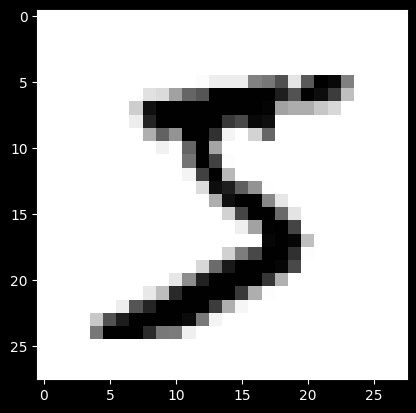

In [14]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

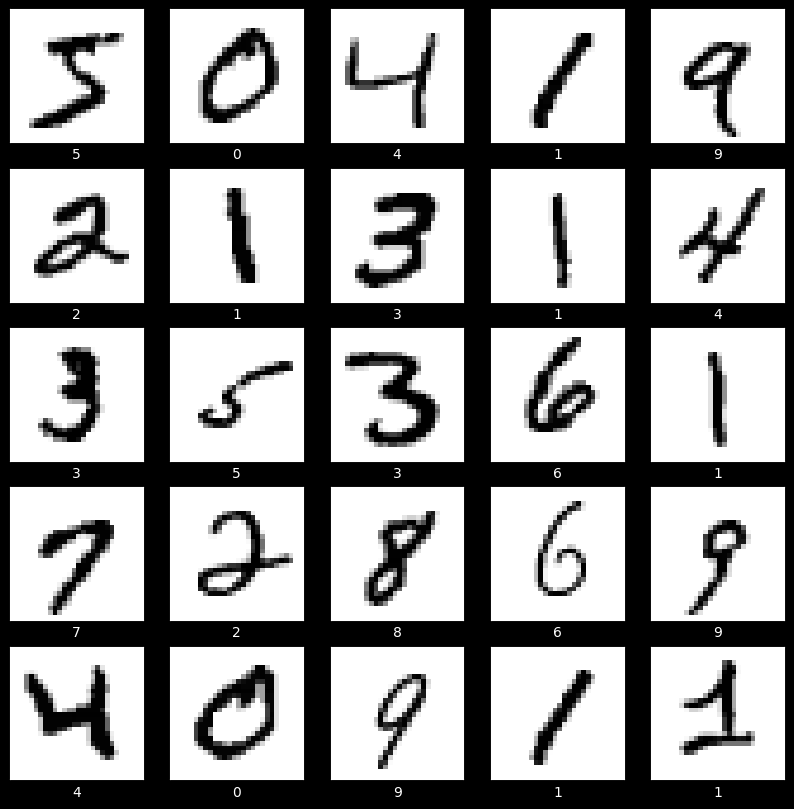

In [17]:
numbers_to_display = 25

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (10,10))

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

In [18]:
X_train_with_channels = X_train.reshape(
    X_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_test_with_channels = X_test.reshape(
    X_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [19]:
print(f"X_train_with_channels : {X_train_with_channels.shape}")
print(f"X_Test_with_channels : {X_test_with_channels.shape}")

X_train_with_channels : (60000, 28, 28, 1)
X_Test_with_channels : (10000, 28, 28, 1)


In [20]:
X_train_normalized = X_train_with_channels / 255.
X_test_normalized = X_test_with_channels / 255.

In [21]:
X_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [23]:
model = tf.keras.models.Sequential(
    [
        Conv2D(
            input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
            kernel_size = 5,
            filters = 8,
            strides = 1,
            activation = tf.keras.activations.relu,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        ),

        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2)
        ),

        Conv2D(
            kernel_size = 5,
            filters = 16,
            strides = 1,
            activation = tf.keras.activations.relu,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        ),

        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2)
        ),

        Flatten(),

        Dense(
            units = 128,
            activation = tf.keras.activations.relu
        ),

        Dropout(0.2),

        Dense(
            units = 10,
            activation = tf.keras.activations.softmax,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        )
    ]
)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

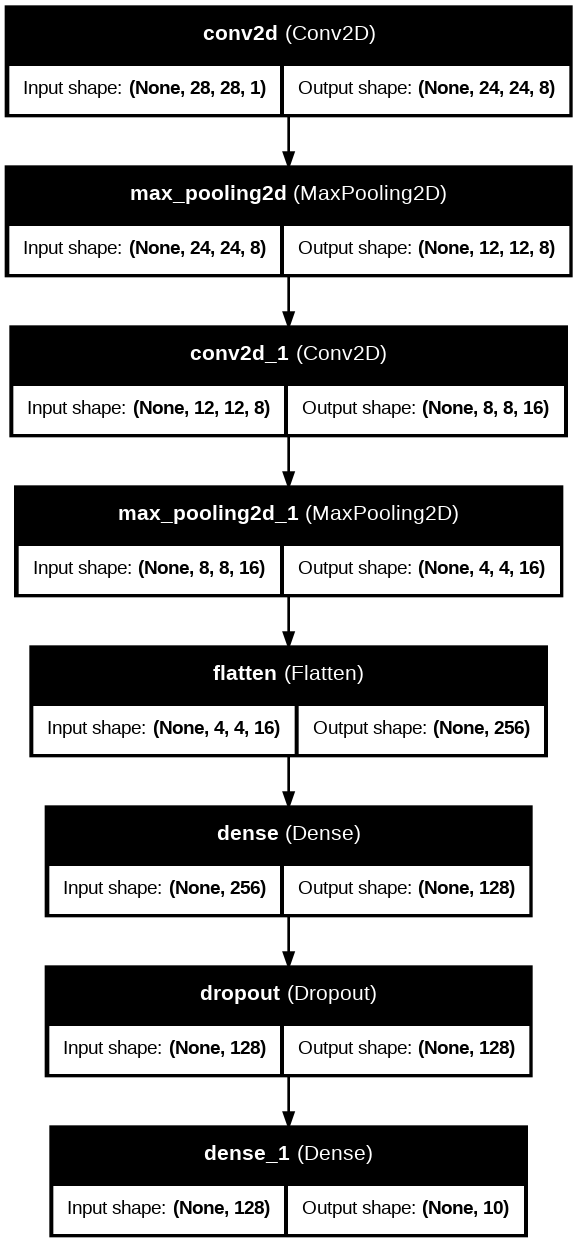

In [25]:
tf.keras.utils.plot_model(
    model,
    to_file = "model_architecture.png",
    show_shapes = True,
    show_layer_names = True,
    dpi = 96,
    rankdir = "TB"
)

In [27]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [28]:
training_history = model.fit(
    X_train_normalized,
    y_train,
    epochs = 10,
    validation_data = (X_test_normalized, y_test),
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8634 - loss: 0.4353 - val_accuracy: 0.9819 - val_loss: 0.0610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9770 - loss: 0.0775 - val_accuracy: 0.9855 - val_loss: 0.0423
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9875 - val_loss: 0.0354
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9898 - val_loss: 0.0303
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9890 - val_loss: 0.0331
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9904 - val_loss: 0.0332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9917 - val_loss: 0.0263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0213 -

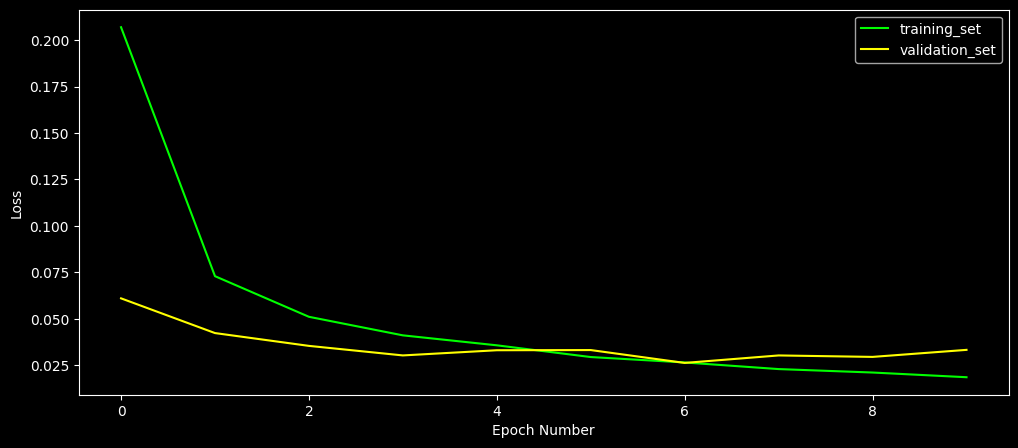

In [29]:
plt.figure(figsize = (12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], color = 'lime', label = "training_set")
plt.plot(training_history.history['val_loss'], color = 'yellow', label = "validation_set")
plt.legend()
plt.show()

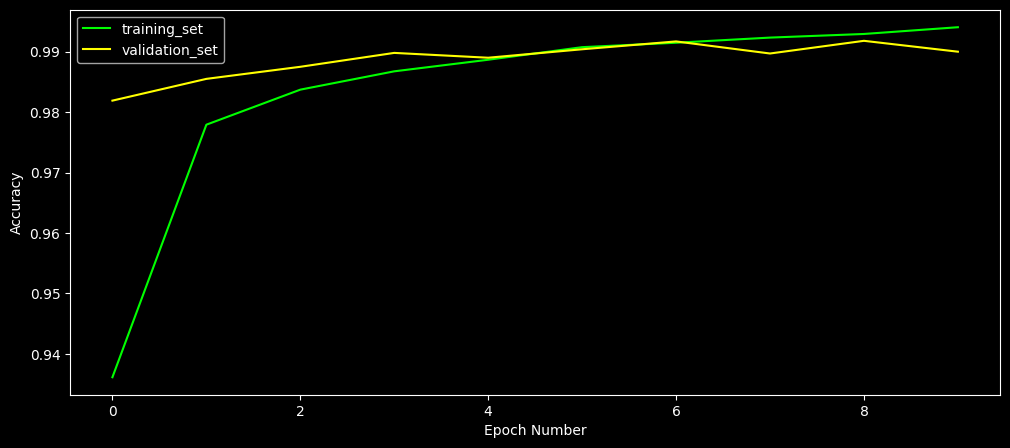

In [30]:
plt.figure(figsize = (12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], color = 'lime', label = "training_set")
plt.plot(training_history.history['val_accuracy'], color = 'yellow', label = "validation_set")
plt.legend()
plt.show()

In [31]:
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train)

print(f"Training Loss : {train_loss}")
print(f"Training Accuracy : {train_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9966 - loss: 0.0094
Training Loss : 0.009514481760561466
Training Accuracy : 0.9967666864395142


In [32]:
validation_loss, validation_accuracy = model.evaluate(X_test_normalized, y_test)

print(f"Training Loss : {validation_loss}")
print(f"Training Accuracy : {validation_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0428
Training Loss : 0.03329844772815704
Training Accuracy : 0.9900000095367432


In [34]:
model_name = "Subhadip_Hensh_MNIST_CNN.keras"
model.save("Subhadip_Hensh_MNIST_CNN.keras")

In [35]:
loaded_model = tf.keras.models.load_model("Subhadip_Hensh_MNIST_CNN.keras")

In [36]:
predictions_one_hot = loaded_model.predict([X_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
print(f"predictions_one_hot : {predictions_one_hot.shape}")

predictions_one_hot : (10000, 10)


In [40]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.555537e-17,3.453885e-12,1.766278e-11,2.926316e-10,1.544456e-10,1.069384e-13,1.340824e-17,1.000000e+00,1.613508e-11,6.328055e-09
1,3.025400e-09,4.205364e-12,1.000000e+00,1.749192e-12,7.703121e-16,3.561283e-18,6.595746e-15,7.269837e-12,1.161332e-13,4.668590e-19
2,2.059595e-05,9.997821e-01,4.527845e-05,4.940473e-08,1.523752e-05,7.479320e-07,4.326540e-07,5.017276e-05,4.185643e-05,4.351352e-05
3,9.999895e-01,1.742233e-11,3.520991e-07,2.578726e-07,5.656403e-09,2.995178e-10,9.337683e-06,3.882191e-09,4.913849e-07,1.141042e-07
4,5.969751e-14,2.521963e-14,1.979730e-14,1.237411e-12,9.999349e-01,2.121051e-10,7.881640e-13,5.563259e-12,7.824486e-12,6.505484e-05
...,...,...,...,...,...,...,...,...,...,...
9995,8.472539e-12,6.648466e-10,9.999993e-01,1.244794e-09,3.276485e-14,1.731398e-18,1.901287e-16,7.355867e-07,1.089544e-11,8.759489e-17
9996,3.691735e-12,1.532366e-11,6.238844e-08,9.999999e-01,9.904976e-15,1.026748e-10,2.483420e-16,2.639329e-09,1.822966e-09,1.292922e-11
9997,1.043359e-24,4.280850e-14,8.611988e-17,2.091460e-21,1.000000e+00,1.335021e-17,6.993140e-18,2.908622e-13,1.976685e-11,6.153309e-11
9998,1.385391e-20,9.231678e-23,5.805604e-22,1.308098e-14,8.886463e-21,1.000000e+00,9.812201e-15,7.162295e-22,1.218287e-09,6.948780e-19


In [41]:
predictions_one_hot.sum(axis = 1)[0]

np.float32(1.0)

In [42]:
for i in range(10):
    print(f"{i} row sum is : {predictions_one_hot.sum(axis = 1)[0]}")

0 row sum is : 1.0
1 row sum is : 1.0
2 row sum is : 1.0
3 row sum is : 1.0
4 row sum is : 1.0
5 row sum is : 1.0
6 row sum is : 1.0
7 row sum is : 1.0
8 row sum is : 1.0
9 row sum is : 1.0


In [43]:
predictions = np.argmax(predictions_one_hot, axis = 1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [44]:
for i in range(10):
    print(predictions[i], end = ",")

7,2,1,0,4,1,4,9,5,9,

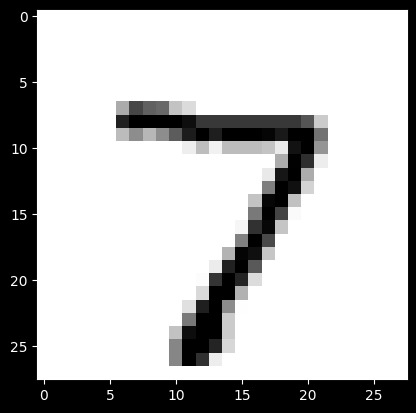

In [45]:
plt.imshow(X_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap = plt.cm.binary)

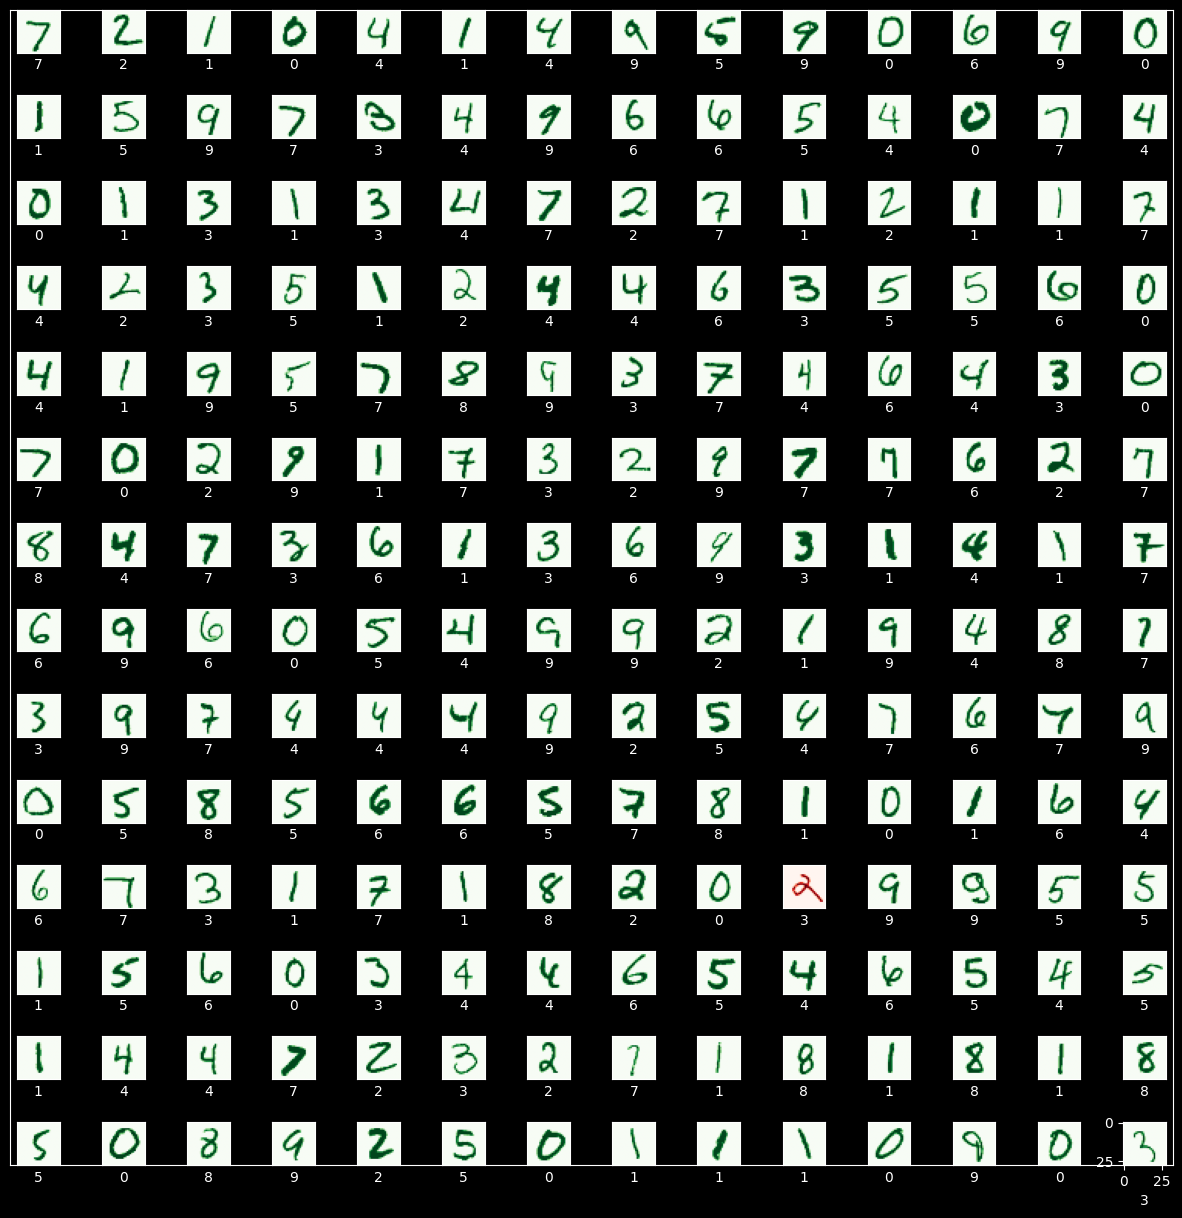

In [46]:
numbers_to_display = 196

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = "Greens" if predicted_label == y_test[plot_index] else "Reds"
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap = color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace = 1, wspace = 0.5)
plt.show()

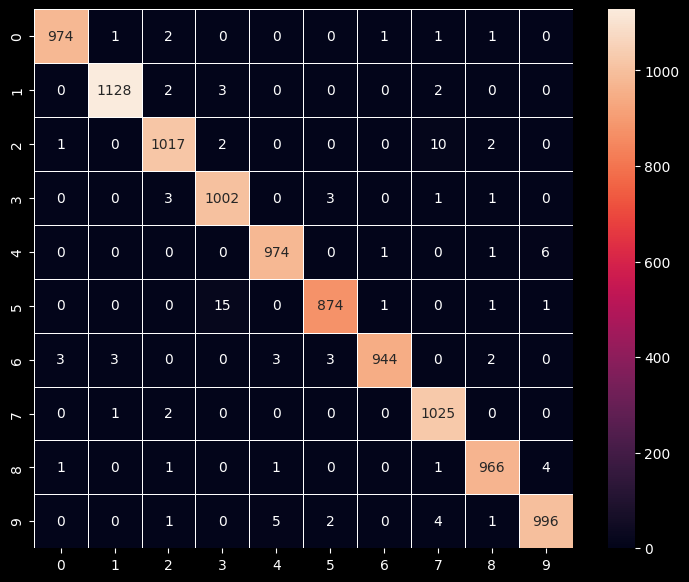

In [47]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize = (9, 7))

sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = 0.5,
    fmt = "d",
    square = True,
    ax = ax
)

plt.show()